# Compare Territories

This should include:
 - Classify major territories (LAD, Diag1, Diag2, Intermedius, LCx, RPLA, PDA)
 - Take index MBF in each territory
 - Output Bar charts

In [41]:
#classify major territories
import numpy as np

MBF_data_pre = {"LAD": np.array([]), "LCx": np.array([]), "Intermedius": np.array([]), "Diag1": np.array([]), "Diag2": np.array([]), "PDA": np.array([]), "PL": np.array([])}
MBF_data_post = {"LAD": np.array([]), "LCx": np.array([]), "Intermedius": np.array([]), "Diag1": np.array([]), "Diag2": np.array([]), "PDA": np.array([]), "PL": np.array([])}
MBF_Labels = {"LAD": [], "LCx":[], "Intermedius":[], "Diag1":[], "Diag2":[], "PDA":[], "PL":[]}

InputMBFB = "/Users/ana/Documents/AnahitaSeresti/05_PrePostCABG/MBFMaps/SU11B/MBF_Territories.vtu"
InputMBFA = "/Users/ana/Documents/AnahitaSeresti/05_PrePostCABG/MBFMaps/SU11A/MBF_Territories.vtu"
InputLabelFile = "/Users/ana/Documents/AnahitaSeresti/05_PrePostCABG/MBFMaps/SU11B/MBF_Territories_Labels.dat"

with open(InputLabelFile, "r") as ifile:
    for LINE in ifile:
        line = LINE.split()
        for key in MBF_Labels.keys():
            if line[1].find(key)>=0: MBF_Labels[key].append(int(line[0]))

In [42]:
import vtk
import numpy as np
from utilities import ReadVTUFile, ThresholdInBetween
from vtk.util.numpy_support import vtk_to_numpy

MBF_A = ReadVTUFile(InputMBFA)
MBF_B = ReadVTUFile(InputMBFB)

for key in MBF_Labels.keys():
    for i in MBF_Labels[key]:
        territory_b = ThresholdInBetween(MBF_B, "TerritoryMaps", i, i+1)
        indexMBF_ = vtk_to_numpy(territory_b.GetPointData().GetArray("IndexMBF"))
        MBF_data_post[key] = np.append(indexMBF_, MBF_data_post[key])

        territory_a = ThresholdInBetween(MBF_A, "TerritoryMaps", i, i+1)
        indexMBF_ = vtk_to_numpy(territory_a.GetPointData().GetArray("IndexMBF"))
        MBF_data_pre[key] = np.append(indexMBF_, MBF_data_pre[key])



AttributeError: 'NoneType' object has no attribute 'GetDataType'

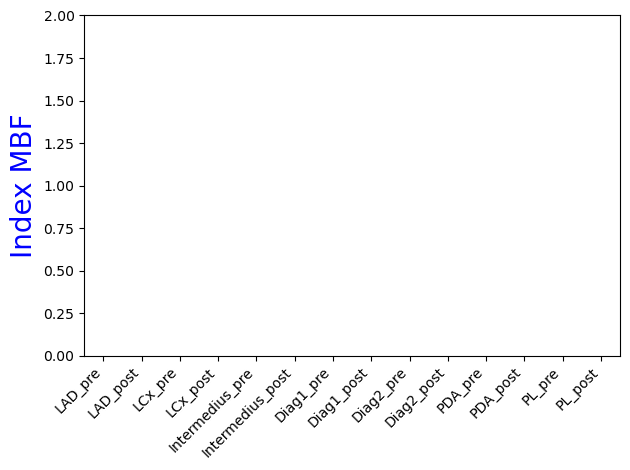

In [30]:
#plot
import matplotlib.pyplot as plt

Labels = []
IndexMBF = []
for key in MBF_Labels.keys():
    Labels.append(f'{key}_pre')
    Labels.append(f'{key}_post')
    IndexMBF.append(MBF_data_pre[key])
    IndexMBF.append(MBF_data_post[key])


colors = ['aquamarine', 'aquamarine', 'mediumspringgreen', 'mediumspringgreen', 'palegreen', 'palegreen', 'thistle', 'thistle', 'lavender', 'lavender', 'salmon', 'salmon', 'peachpuff', 'peachpuff']

fig, ax = plt.subplots()
ax.set_ylabel("Index MBF", fontdict={'color':'blue','size':20})
ax.set_ylim(0, 2)


bplot = ax.boxplot(IndexMBF, patch_artist=True, labels=Labels, showfliers= False)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_color(color)

for median in bplot['medians']:
    median.set_color('darkblue')
    median.set_linewidth(2)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()





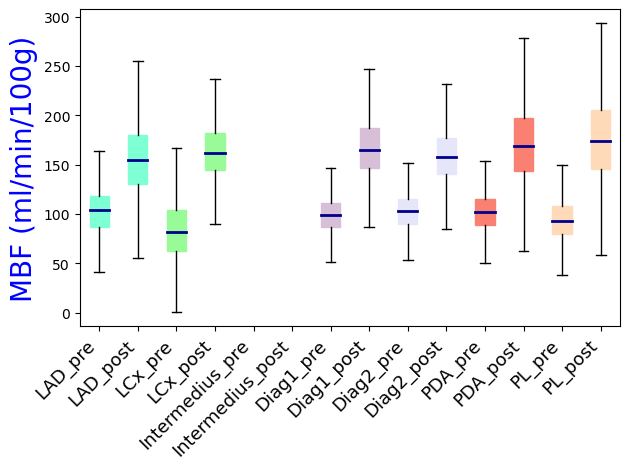

In [43]:
MBF_data_pre = {"LAD": np.array([]), "LCx": np.array([]), "Intermedius": np.array([]), "Diag1": np.array([]), "Diag2": np.array([]), "PDA": np.array([]), "PL": np.array([])}
MBF_data_post = {"LAD": np.array([]), "LCx": np.array([]), "Intermedius": np.array([]), "Diag1": np.array([]), "Diag2": np.array([]), "PDA": np.array([]), "PL": np.array([])}

for key in MBF_Labels.keys():
    for i in MBF_Labels[key]:
        territory_b = ThresholdInBetween(MBF_B, "TerritoryMaps", i, i+1)
        indexMBF_ = vtk_to_numpy(territory_b.GetPointData().GetArray(0))
        MBF_data_post[key] = np.append(indexMBF_, MBF_data_post[key])

        territory_a = ThresholdInBetween(MBF_A, "TerritoryMaps", i, i+1)
        indexMBF_ = vtk_to_numpy(territory_a.GetPointData().GetArray(0))
        MBF_data_pre[key] = np.append(indexMBF_, MBF_data_pre[key])

Labels = []
IndexMBF = []
for key in MBF_Labels.keys():
    Labels.append(f'{key}_pre')
    Labels.append(f'{key}_post')
    IndexMBF.append(MBF_data_pre[key])
    IndexMBF.append(MBF_data_post[key])


colors = ['aquamarine', 'aquamarine', 'palegreen', 'palegreen', 'lightcyan', 'lightcyan', 'thistle', 'thistle', 'lavender', 'lavender', 'salmon', 'salmon', 'peachpuff', 'peachpuff']

fig, ax = plt.subplots()
ax.set_ylabel("MBF (ml/min/100g)", fontdict={'color':'blue','size':20})
#ax.set_ylim(0, 2)


bplot = ax.boxplot(IndexMBF, patch_artist=True, labels=Labels, showfliers= False)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_color(color)

for median in bplot['medians']:
    median.set_color('darkblue')
    median.set_linewidth(2)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize = 13)

plt.tight_layout()
plt.show()


In [32]:
for (i, key) in enumerate(MBF_Labels.keys()):
    print(key, i)

if 2 is not 1:
    print( "2 is not 1")

LAD 0
LCx 1
Intermedius 2
Diag1 3
Diag2 4
PDA 5
PL 6
2 is not 1


<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/05/bygg4rdj3n7543jkngl6k6z40000gn/T/ipykernel_61496/3992551269.py:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if 2 is not 1:


In [33]:
print(MBF_data_pre["Intermedius"] is None)

False


In [44]:
cavitycapped = "/Users/ana/Documents/AnahitaSeresti/05_PrePostCABG/MBFMaps/SU11B/Morphology/CavityCapped.vtp"
endocardium = "/Users/ana/Documents/AnahitaSeresti/05_PrePostCABG/MBFMaps/SU11B/Morphology/Endocardium.vtp"
epicardium = "/Users/ana/Documents/AnahitaSeresti/05_PrePostCABG/MBFMaps/SU11B/Morphology/Epicardium.vtp"

from utilities import ReadVTPFile

CavityCapped = ReadVTPFile(cavitycapped)
Endocardium = ReadVTPFile(endocardium)
Epicardium = ReadVTPFile(epicardium)



In [35]:
CavityProp = vtk.vtkMassProperties()
CavityProp.SetInputData(CavityCapped)
CavityProp.Update()
volume = CavityProp.GetVolume()
volume

48.66945323158335

In [36]:
EndoProp = vtk.vtkMassProperties()
EndoProp.SetInputData(Endocardium)
EndoProp.Update()
surface = EndoProp.GetSurfaceArea()
surface

85.8343307458935

In [45]:
distancefilter = vtk.vtkDistancePolyDataFilter()
distancefilter.SetInputData(1, Endocardium)
distancefilter.SetInputData(0, Epicardium)
distancefilter.SignedDistanceOff()
distancefilter.Update()

distoutput = distancefilter.GetOutput()


In [38]:
InputFolderA = "path/to/SU11A"
InputFolderB = f"{InputFolderA[:-1]}B"
InputFolderB

'path/to/SU11B'

In [ ]:
from utilities import ExtractSurface

MBF_surface = ExtractSurface(MBF_B)

In [ ]:
TerritoyProfile_Array = vtk.vtkFloatArray()
TerritoyProfile_Array.SetName("TerritoryMaps")
TerritoyProfile_Array.SetNumberOfComponents(1)
TerritoyProfile_Array.SetNumberOfTuples(distoutput.GetNumberOfPoints())

TerritoryMap = MBF_B.GetPointData().GetArray("TerritoryMaps")

Locator = vtk.vtkPointLocator()
Locator.SetDataSet(MBF_B)
Locator.BuildLocator()

for i in range(distoutput.GetNumberOfPoints()):
    point = distoutput.GetPoint(i)
    closest_point_id = Locator.FindClosestPoint(point)

    TerritoyProfile_Array.SetValue(i, TerritoryMap.GetValue(closest_point_id))

distoutput.GetPointData().AddArray(TerritoyProfile_Array)

import os
from utilities import WriteVTPFile
WriteVTPFile(f"{os.path.splitext(epicardium)[0]}_distance.vtp", distoutput)